
First 5 rows of dataset:
  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3 

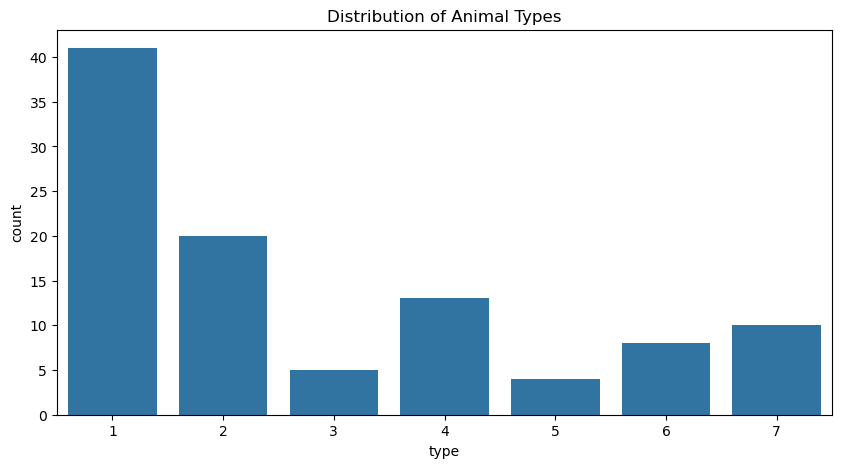

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load and analyze the data
df = pd.read_csv('Zoo.csv')  # Update this to your actual dataset path
print("\nFirst 5 rows of dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nClass Distribution:")
print(df['type'].value_counts())

# Visualizations
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.show()

sns.pairplot(df, hue='type')
plt.show()

# Step 2: Preprocess the data
# Handle missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

imputer = SimpleImputer(strategy='mean')
features = df.drop('type', axis=1)
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Handle outliers (Z-score method)
from scipy.stats import zscore
z_scores = np.abs(zscore(features_imputed))
df_no_outliers = features_imputed[(z_scores < 3).all(axis=1)]
target_no_outliers = df['type'].iloc[df_no_outliers.index]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_no_outliers, target_no_outliers, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Implement KNN
k = 5  # You can tune this value
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  # Euclidean distance
knn.fit(X_train_scaled, y_train)

# Step 6: Evaluation
y_pred = knn.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# Step 7: Visualize Decision Boundaries (only on first 2 features for simplicity)
def plot_decision_boundary(X, y, model, title):
    X = X[:, :2]  # Take only first 2 features
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFACD', '#FFC0CB'])
    cmap_bold = ['red', 'green', 'blue', 'darkorange', 'purple']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    for idx, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=label, c=cmap_bold[idx])

    plt.legend()
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X_train_scaled, y_train.values, knn, "KNN Decision Boundary (first 2 features)")

